<a href="https://colab.research.google.com/github/junsu122/AI_Basic/blob/main/%EA%B0%95%EC%9D%98_7%EA%B8%B0_AI%EA%B0%9C%EB%A1%A0_1%EC%B0%A8%EC%8B%9C_01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미리보기 & 이미지 인식 시작하기

* 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

# sudo: switch user do : 관리자 권한
# apt-get install -y: 패키지를 자동으로 설치 (y 옵션으로 설치 확인 과정 생략)
# fonts-nanum*: 나눔 폰트 패키지들을 모두 설치 (*는 와일드카드)
# | tail -n 1: 설치 과정의 마지막 줄만 출력
# fc-cache: 폰트 캐시를 갱신하는 명령어
# -f: 강제로 캐시 재생성
# -v: 상세한 출력 표시
# matplotlib 라이브러리의 캐시 디렉토리를 완전히 삭제
# ~/.cache/matplotlib: 사용자 홈 디렉토리의 matplotlib 캐시 폴더
# -rf: 재귀적으로(-r) 강제로(-f) 삭제

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no suc

## 라이브러리 & 커맨드 준비

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
# | tail -n 1: 설치 과정 출력의 마지막 줄만 표시
w = !apt install tree
print(w[-2])
# !apt install tree: 디렉토리 구조를 트리 형태로 보여주는 tree 명령어 설치
# w = : 명령어 실행 결과를 변수 w에 리스트 형태로 저장

Setting up tree (2.0.2-1) ...


* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [ ]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
# .get_name()
# FontProperties 객체에서 해당 폰트의 실제 폰트 이름을 반환

import torch
import torch.nn as nn #neural network
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

## 초기설정

In [ ]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경 // 인치 기준
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [ ]:
# GPU 디바이스 할당 (8장)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
# 공통함수 읽어오기 (9장)

# 공통함수 다운로드
!git clone https://github.com/wikibook/pythonlibs.git

# 공통함수 임포트
from pythonlibs.torch_lib1 import *

# 공통함수 체크
print(README)

Cloning into 'pythonlibs'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 25 (delta 6), reused 25 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 21.10 MiB | 52.32 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Common Library for PyTorch
Author: M. Akaishi


## 학습 데이터 읽어오기

In [ ]:
# 학습용 데이터 수집하기 (12장)

# 학습용 이미지 다운로드
w = !wget https://github.com/makaishi2/pythonlibs/raw/main/images/dog_wolf.zip
print(w[-2])
# !wget: 리눅스의 wget 명령어를 실행하여 파일 다운로드

# 학습용 이미지 압축풀기
w = !unzip dog_wolf.zip
print(w[-1])
# 디렉토리명 설정
data_dir = 'dog_wolf'
# directory (win) folder

# 학습, 테스트 디렉토리명 설정
import os
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')  # hold-out

# 분류 클래스 설정
classes = ['dog', 'wolf']

# 압축해제 결과 트리 구조 보기
!tree dog_wolf

2026-01-08 05:10:33 (432 MB/s) - ‘dog_wolf.zip’ saved [21811374/21811374]
  inflating: dog_wolf/train/wolf/wolf-09.png  
dog_wolf
├── test
│   ├── dog
│   │   ├── dog-21.png
│   │   ├── dog-22.png
│   │   ├── dog-23.png
│   │   ├── dog-24.png
│   │   └── dog-25.png
│   └── wolf
│       ├── wolf-21.png
│       ├── wolf-22.png
│       ├── wolf-23.png
│       ├── wolf-24.png
│       └── wolf-25.png
└── train
    ├── dog
    │   ├── dog-01.png
    │   ├── dog-02.png
    │   ├── dog-03.png
    │   ├── dog-04.png
    │   ├── dog-05.png
    │   ├── dog-06.png
    │   ├── dog-07.png
    │   ├── dog-08.png
    │   ├── dog-09.png
    │   ├── dog-10.png
    │   ├── dog-11.png
    │   ├── dog-12.png
    │   ├── dog-13.png
    │   ├── dog-14.png
    │   ├── dog-15.png
    │   ├── dog-16.png
    │   ├── dog-17.png
    │   ├── dog-18.png
    │   ├── dog-19.png
    │   └── dog-20.png
    └── wolf
        ├── wolf-01.png
        ├── wolf-02.png
        ├── wolf-03.png
        ├── wolf-04.png
        ├─

In [ ]:
# 학습용 데이터 준비하기 (8장, 10장, 12장)

# transform 의 정의
# 검증 데이터용: 정규화만을 실시
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])


In [ ]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)
])

코드 분석:
1. transforms.Compose([])

- 여러 개의 변환(transform)을 순차적으로 적용하는 파이프라인 생성
리스트 안의 변환들이 위에서부터 순서대로 실행됨

2. 각 변환 단계:
- transforms.Resize(224)
  - 이미지의 짧은 쪽을 224픽셀로 리사이즈
  - 가로세로 비율(aspect ratio)은 유지

- transforms.CenterCrop(224)
  - 이미지의 중앙에서 224x224 크기로 자르기
  - Resize 후 긴 쪽이 224보다 클 경우 중앙 부분만 추출
  # 224는 별 의미 없고, 선호 숫자

- transforms.ToTensor()
  - PIL Image나 numpy 배열을 PyTorch 텐서로 변환
  - 픽셀 값을 [0, 255] 범위에서 [0, 1] 범위로 정규화
  - 차원 순서를 (H, W, C)에서 (C, H, W)로 변경*
  # 순서가 바뀐다   GPU에 들어갈때 순서 고려 때문에 바뀜


- transforms.Normalize(0.5, 0.5)
  - 각 채널의 픽셀 값을 정규화: (pixel - mean) / std
mean=0.5, std=0.5이므로 [0, 1] 범위를 [-1, 1] 범위로 변환

3. 최종 결과:
- 입력: 임의 크기의 이미지
- 출력: 224x224x3 크기, [-1, 1] 범위의 PyTorch 텐서

In [ ]:
# 학습 데이터용: 정규화에 RandomHorizontalFlip 과 RandomErasing 을 추가로 실시
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

In [ ]:
train_trasform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5),
    transforms.RandomErasing(p=0.5,scale=(0.02,0.33),ratio=(0.3,3.3),value=0,inplace=False)
])

코드 분석:
1. transforms.RandomHorizontalFlip(p=0.5)
- 50% 확률로 이미지를 좌우 반전
- 학습 데이터의 다양성을 증가시켜 과적합 방지 (과적합 : 일반화의 오류)
- 개/늑대 같은 동물 이미지에서 유용 (좌우 대칭성)

2. transforms.Resize(224), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(0.5, 0.5)
- 검증용과 동일한 기본 전처리 과정
- 224x224 크기로 조정 후 [-1, 1] 범위로 정규화

3. transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
- 50% 확률로 이미지의 일부분을 임의로 지우기
- 매개변수 설명:
  - p=0.5: 50% 확률로 적용
  - scale=(0.02, 0.33): 지울 영역의 크기가 전체 이미지의 2%~33%
  - ratio=(0.3, 3.3): 지울 영역의 가로세로 비율이 0.3~3.3 범위
  - value=0: 지운 부분을 0으로 채움 (정규화 후이므로 회색)
  - inplace=False: 원본 텐서를 수정하지 않고 새로운 텐서 반환

- 데이터 증강의 효과: * (무작의, 랜덤, 등등 -> 일반화를 한다)*
  - RandomHorizontalFlip: 좌우 대칭 변형으로 데이터 2배 증가 효과
  - RandomErasing: 모델이 이미지의 특정 부분에만 의존하지 않도록 강제, 일반화 성능 향상
  - 이런 증강 기법들은 학습 시에만 적용하고, 검증/테스트 시에는 사용하지 않아 일관된 성능 평가를 보장

In [ ]:
# dataset 정의
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
# 학습용 데이터셋: 데이터 증강이 적용된 train_transform 사용
# 폴더 구조 기반으로 자동 라벨링 (폴더명이 클래스명)
train_data2 = datasets.ImageFolder(train_dir, transform=test_transform)
# 같은 학습 데이터지만 증강 없는 test_transform 사용
# 학습 데이터의 원본 성능 평가용
test_data = datasets.ImageFolder(test_dir, transform=test_transform)
# 테스트용 데이터셋: 증강 없는 test_transform 사용

# dataloader 정의
# batch_size(묶어서 보내는거) 생기면 GPU를 사용해야함. 무거워서.
batch_size = 5

#train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
# 테스트 데이터 건들지마!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_loader = DataLoader(train_data, batch_size=5, shuffle=True)
# 실제 학습용: 배치 크기 5, 데이터 섞음 (랜덤 순서)
# >> 데이터 증강 적용됨
train_loader2 = DataLoader(train_data2, batch_size=40, shuffle=False)
# 학습 데이터 평가용: 큰 배치(40), 순서 고정
# 증강 없이 원본 상태로 평가
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)
# 테스트용: 작은 배치, 순서 고정
# 일관된 테스트 결과를 위해 shuffle=False
test_loader2 = DataLoader(test_data, batch_size=10, shuffle=True)
# 시각화/샘플링용: 중간 배치 크기, 랜덤 샘플링
# 다양한 테스트 샘플 확인용

## 학습 이미지 데이터 확인

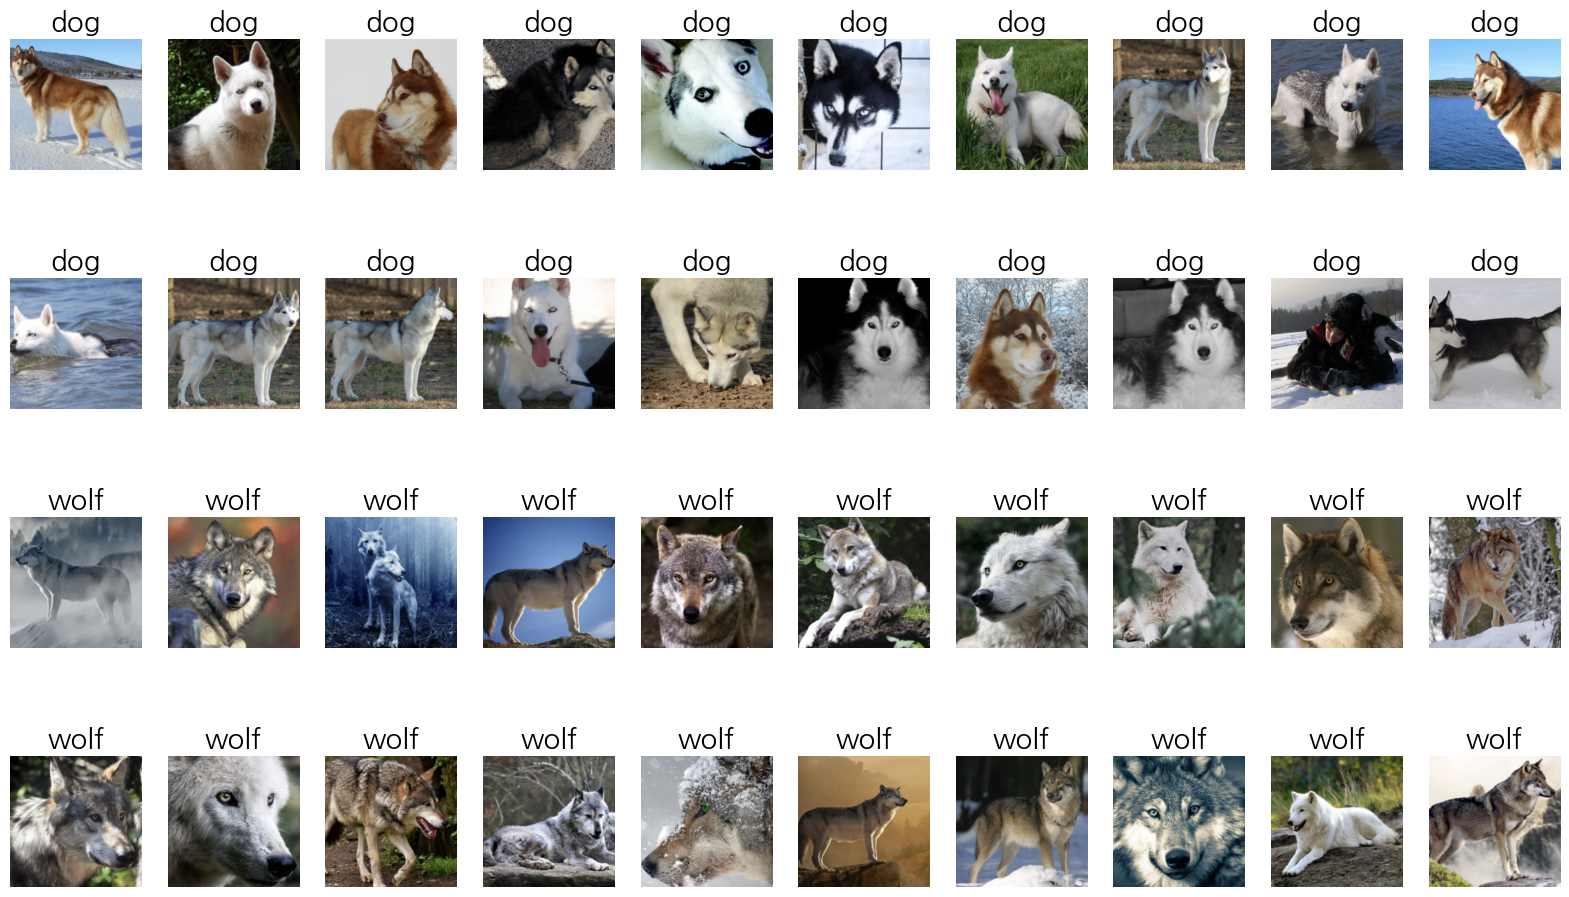

In [ ]:
# 학습용 데이터 (４0건)
show_images_labels(train_loader2, classes, None, None)

## 검증 이미지 데이터 확인

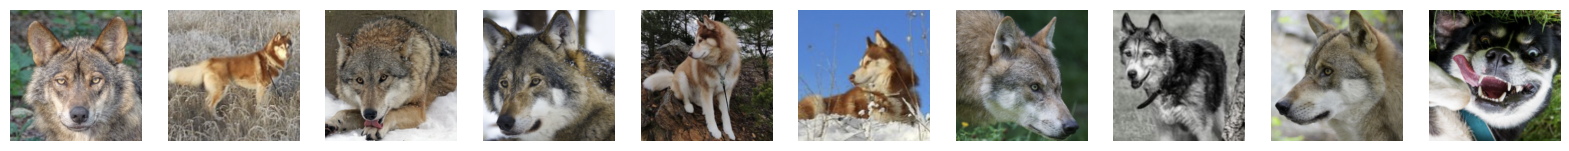

In [ ]:
# 검증용 데이터 (10건)
# 우선 정답 라벨 없이 이미지만을 표시합니다.
# 각 사진이 개와 늑대중 어떤 것인지 각자 판단해 보기 바랍니다.
torch_seed()
show_images_labels(test_loader2, ['', ''], None, None)

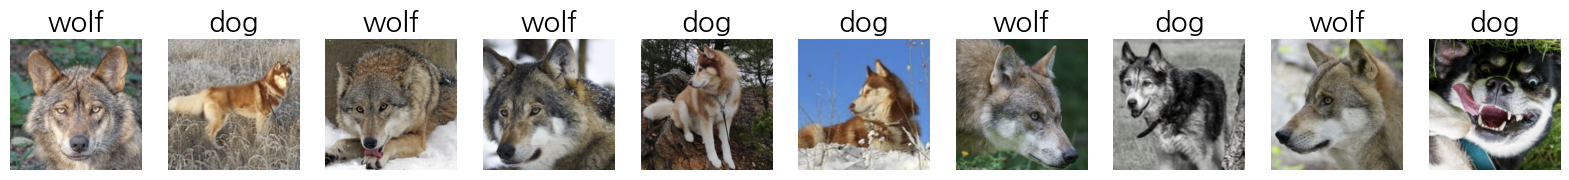

In [ ]:
# 검증용 데이터 (10건)
# 이것이 정답 데이터 입니다.
# 10건 중 몇 건의 정답을 맞췄습니까.
torch_seed()
show_images_labels(test_loader2, classes, None, None)

## 모델 구축

In [ ]:
# 사전에 학습이 끝난 모델을 이용해서 모델을 구축 (11장)

# 사전에 학습이 끝난 모델 읽어오기
from torchvision import models
net = models.vgg19_bn(pretrained = True)

# 전이 학습을 위해 required_grad 그래프를 False 로 설정
for param in net.parameters():
    param.requires_grad = False

# 난수 고정
torch_seed()

# 마지막 노드의 출력을 2로 변경
in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 2)

# AdaptiveAvgPool2d 함수 제거
net.avgpool = nn.Identity()

# GPU 사용
net = net.to(device)

# 학습률 러닝레이트
lr = 0.001

# 손실 함수로 교차 엔트로피 사용
criterion = nn.CrossEntropyLoss()

# 최적화함수 정의

# 파라미터 수정 대상을 마지막 노드로 제한함
optimizer = optim.SGD(net.classifier[6].parameters(),lr=lr,momentum=0.9)

# history 파일을 동시에 초기화
history = np.zeros((0, 5))

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


100%|██████████| 548M/548M [00:07<00:00, 73.8MB/s]


In [ ]:
np.zeros((0, 5))

array([], shape=(0, 5), dtype=float64)

## 학습

In [ ]:
# 학습(9장)
# 반복 횟수
num_epochs = 10

# 학습 (공통함수)
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.13004 acc: 0.62500 val_loss: 0.07444, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.05984 acc: 0.92500 val_loss: 0.06261, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.04677 acc: 0.92500 val_loss: 0.04735, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.01644 acc: 1.00000 val_loss: 0.05315, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.02094 acc: 1.00000 val_loss: 0.04005, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.03593 acc: 0.95000 val_loss: 0.04252, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.01324 acc: 1.00000 val_loss: 0.04667, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.01895 acc: 0.97500 val_loss: 0.05283, val_acc: 0.80000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.01770 acc: 0.97500 val_loss: 0.04894, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.01024 acc: 0.97500 val_loss: 0.03794, val_acc: 0.90000


## 결과 확인

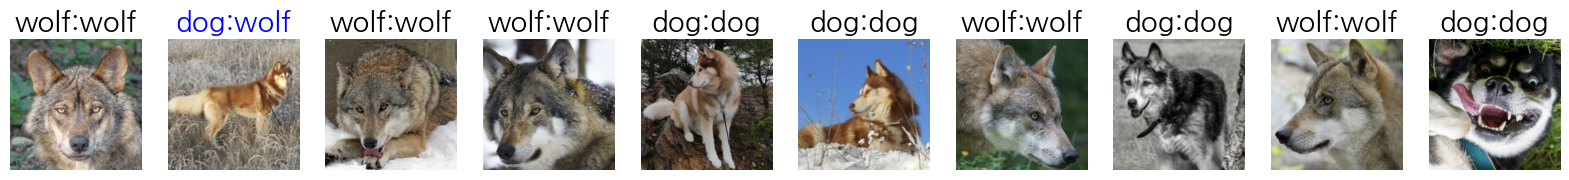

In [ ]:
# 검증 데이터를 대상으로 결과 확인 (9장 공통함수)
torch_seed()
show_images_labels(test_loader2, classes, net, device)

## (참고)　공통함수의 내부 구조

In [ ]:
# 학습용 함수
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    base_epochs = len(history)

    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        # 학습 페이즈
        net.train()
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 그라디언트 초기화
            optimizer.zero_grad()

            # 예측 계산
            outputs = net(inputs) # y_hat : 실제값인 y 비교

            # 손실 계산
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # 그라이언트 계산(역전파)
            loss.backward()

            # 파라미터 수정
            optimizer.step()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답을 맞춘 수 산출
            train_acc += (predicted == labels).sum()

            # 평균 손실값과 정확도 계산
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        # 예측 페이즈
        net.eval()
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)

            inputs = inputs.to(device)
            labels = labels.to(device)

            # 예측 계산
            outputs = net(inputs)

            # 손실 계산
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # 예측 라벨 산출
            predicted = torch.max(outputs, 1)[1]

            # 정답을 맞춘 수 산출
            val_acc += (predicted == labels).sum()

            # 평균 손실값과 정확도 계산
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count

        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history


In [ ]:
# 이미지와 라벨 표시
def show_images_labels(loader, classes, net, device):

    # 데이터로더에서 최초 한 세트의 이미지와 라벨을 취득
    for images, labels in loader:
        break
    # 표시 수는 숫자 50과 배치사이즈를 비교해 작은 쪽을 선택
    n_size = min(len(images), 50)

    if net is not None:
        # 디바이스에 데이터 할당
        inputs = images.to(device)
        labels = labels.to(device)

        # 예측 계산
        outputs = net(inputs)
        predicted = torch.max(outputs,1)[1]
        #images = images.to('cpu')

    # 최초 n_size 만큼 표시
    plt.figure(figsize=(20, 15))
    for i in range(n_size):
        ax = plt.subplot(5, 10, i + 1)
        label_name = classes[labels[i]]
        # net 이 None 이 아니면 예측 결과도 타이틀에 표기
        if net is not None:
            predicted_name = classes[predicted[i]]
            # 정답 여부를 색으로 나눔
            if label_name == predicted_name:
                c = 'k'
            else:
                c = 'b'
            ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
        # net 가 None 일 경우는 정답 라벨만을 표시
        else:
            ax.set_title(label_name, fontsize=20)
        # 텐서를 넘파이로 변환
        image_np = images[i].numpy().copy()
        # 축의 순서 변경 (channel, row, column) -> (row, column, channel)
        img = np.transpose(image_np, (1, 2, 0))
        # 값의 범위를 [-1, 1] -> [0, 1] 로 되돌리기
        img = (img + 1)/2
        # 결과 표시
        plt.imshow(img)
        ax.set_axis_off()
    plt.show()

In [ ]:
# 파이토치 난수 고정

def torch_seed(seed=123):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.use_deterministic_algorithms = True